# Adaptive Intelligence Assignment 2

I provide here an Python implementation of the Reinforcement Learning algorithms described in the assignment.
This code is an extension of the code provided in the lab week 8 of the module, therefore, a major part of the credit goes to this implementation. 

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_min_steps(x, y):
    return (abs(x[0]-y[0]) + abs(x[1]-y[1]))

def homing_nn(n_trials,n_steps,learning_rate,eps,gamma,tracking_matrix_display=False):
    ## Definition of the environment
    N = 10                               #height of the gridworld ---> number of rows
    M = 10                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    tracking_matrix = np.zeros((N, M))
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([7, 3])                                  #terminal state--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    ## Rewards
    R = 1                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))
    extra_steps = np.zeros((1, n_trials))
    
    ## SARSA

    # Start trials
    for trial in range(n_trials):
        
        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        #print('Start ', Start)
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        #print('Start Index ', s_start)
        #print('End ', End)
        #print('Minim Distance ', get_min_steps(Start, End))
        min_steps = get_min_steps(Start, End)
        #print('End Index ', s_end)
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector)))    #Qvalue is 2x1 implementation of logsig

            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #1--->greedy action 0--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action


            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index
            
            ## TODO update Qvalues. Only if is not the first step
            if step > 1:
                dw = learning_rate*(r_old - Q_old + gamma * Q[action]) * output_old.dot(input_old.T)
                weights += dw

            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Q_old = Q[action]
            r_old = 0

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new
            
            tracking_matrix[state_new[0]][state_new[1]] += 1

            ## TODO: check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw = learningRate * (R - Q_old) * output_old*input_old.T
                weights += dw
            if step == n_steps:
                dw = learningRate * (-R - Q_old) * output_old*input_old.T
                weights += dw
                
        extra_steps[0,trial] = step - min_steps
        
    if tracking_matrix_display:
        return tracking_matrix
    else:
        return extra_steps

In [351]:
# Parameter setup
nrepetitions = 15;  # number of runs for the algorithm
nTrials = 2000;     # should be integer >0
nSteps = 50;        # maximum number of allowed steps 
learningRate = 1; # should be real, Greater than 0
epsilon = 0;     # should be real, Greater or Equal to 0; epsion=0 Greedy, otherwise epsilon-Greedy
gamma = 0.9;        # should be real, positive, smaller than 1


total_extra_steps = np.zeros((nrepetitions,nTrials))

for j in range(nrepetitions):
    print(j)
    total_extra_steps[j,:] = homing_nn(nTrials,nSteps,learningRate,epsilon,gamma)
    
means = np.mean(total_extra_steps, axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


0.7484000000000001


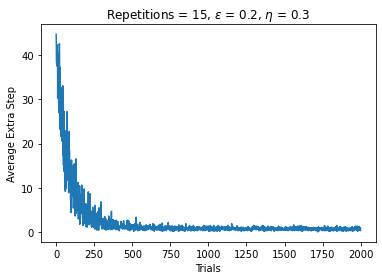

In [353]:
plt.title("Repetitions = 15, $\epsilon$ = 0.2, $\eta$ = 0.3")
plt.plot(means)
plt.xlabel("Trials")
plt.ylabel("Average Extra Step")
av_steps_500 = np.mean(means[500:])
print(av_steps_500)

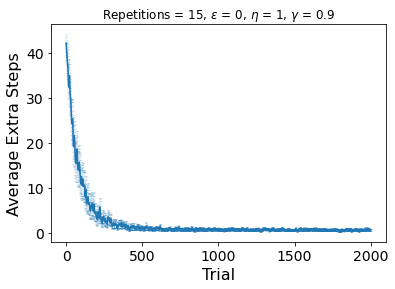

In [359]:
from scipy.ndimage import gaussian_filter1d

errors = np.std(total_extra_steps, axis = 0) / np.sqrt(nrepetitions) # errorbars are equal to twice standard error i.e. std/sqrt(samples)

smooth_means = gaussian_filter1d(means, 2)
smooth_errors = gaussian_filter1d(errors, 2)

plt.errorbar(np.arange(nTrials), smooth_means, smooth_errors, 0, elinewidth = 0.1, capsize = 1, alpha =0.2)
plt.plot(smooth_means, 'tab:blue') # Plot the mean on top to standout

plt.title("Repetitions = 15, $\epsilon$ = 0, $\eta$ = 1, $\gamma$ = 0.9")
plt.xlabel('Trial',fontsize = 16)
plt.ylabel('Average Extra Steps',fontsize = 16)
plt.tick_params(axis = 'both', which='major', labelsize = 14)
plt.savefig('before_eligibility.png', dpi=300)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Text(0.5, 1.0, 'Repetitions = 15, $\\epsilon$ = 0.85, $\\eta$ = 1')

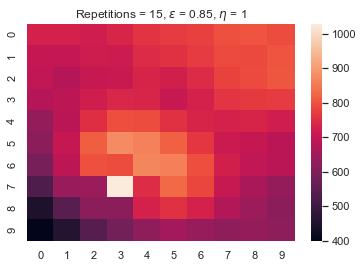

In [9]:
import seaborn as sns
sns.set()

x = np.zeros((10,10))

# Parameter setup
nrepetitions = 15;  # number of runs for the algorithm
nTrials = 2000;     # should be integer >0
nSteps = 50;        # maximum number of allowed steps 
learningRate = 1; # should be real, Greater than 0
epsilon = 0.85;     # should be real, Greater or Equal to 0; epsion=0 Greedy, otherwise epsilon-Greedy
gamma = 0.9;        # should be real, positive, smaller than 1

for j in range(15):
    print(j)
    x += homing_nn(nTrials,nSteps,learningRate,epsilon,gamma,tracking_matrix_display=True)
    
x = x/15

ax = plt.axes()
sns.heatmap(x.astype(int), ax = ax)
ax.set_title('Repetitions = 15, $\epsilon$ = 0.85, $\eta$ = 1')